In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.gridspec import GridSpec
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as mticker
import datetime
import math

In [17]:
Stock = ['IONQ', 'MSFT', "NVDA",]

In [45]:
# Building CandleStick chart

def string_to_number(df, column):
    if isinstance(df.iloc[0, df.columns.get_loc(column)], str):
        df[column] = df[column].str.replace(',', "")
        df[column] = df[column].astype(float)

    return df

def read_data_ohlc(filename, stock_code, usecols):
    df = pd.read_csv(filename, header=None, usecols=usecols, names = ["time", stock_code, 'change', 'volume', 'target'],
                        index_col='time', parse_dates=['time'])
    index_with_nan = df.index[df.isnull().any(axis=1)]
    df.drop(index_with_nan, inplace=True) # 0 for rows

    df.index = pd.DatetimeIndex(df.index)

    df = string_to_number(df, stock_code)
    df = string_to_number(df,'volume')
    df = string_to_number(df,'target')

    latest_info = df.iloc[-1,:]
    latest_price = str(latest_info.iloc[0])
    latest_change = str(latest_info.iloc[1])

    df_vol = df['volume'].resample('1Min').mean() # store for later showing histogram chart

    data = df[stock_code].resample('1Min').ohlc()

    data['time'] = data.index
    data['time'] = pd.to_datetime(data['time'],format='%Y-%m-%d %H:%M:%S')

    data['MA5'] = data['close'].rolling(5).mean()
    data['MA10'] = data['close'].rolling(10).mean()
    data['MA20'] = data['close'].rolling(20).mean()


    """data['MA1'] = data['close'].rolling(1).mean()
    data['MA5'] = data['close'].rolling(5).mean()
    data['MA10'] = data['close'].rolling(10).mean()"""

    data['volume_diff'] = df_vol.diff()
    data[data['volume_diff']<0] = None
    index_with_nan = data.index[data.isnull().any(axis=1)]
    data.drop(index_with_nan,  inplace=True)

    data.reset_index(drop=True, inplace = True)

    return data, latest_price, latest_change, df['target'].iloc[-1], df['volume'].iloc[-1]


[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, '')]

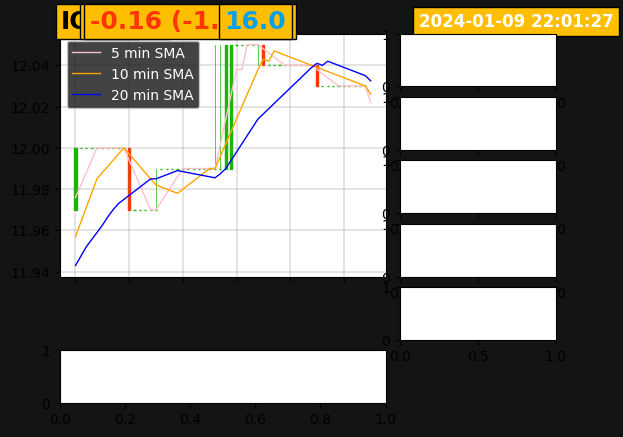

In [46]:
"""time_stamp = datetime.datetime.now() - datetime.timedelta(hours=1) # 1 hour faster than time in Nashville
time_stamp = time_stamp.strftime('%Y-%m-%d')
filename = str(time_stamp)+ ' stock_data.csv'"""


%matplotlib inline
# Plotting:
fig = plt.figure()
fig.patch.set_facecolor("#121416")
gs = fig.add_gridspec(6,6)
ax1 = fig.add_subplot(gs[0:4, 0:4])
ax2 = fig.add_subplot(gs[0, 4:6])
ax3 = fig.add_subplot(gs[1, 4:6])
ax4 = fig.add_subplot(gs[2, 4:6])
ax5 = fig.add_subplot(gs[3, 4:6])
ax6 = fig.add_subplot(gs[4, 4:6])
ax7 = fig.add_subplot(gs[5, 0:4])
# Testing
filename = r'C:\Users\User\Desktop\QuantPack\2024-01-03 stock_data.csv'

data, latest_price, latest_change, target, volume = read_data_ohlc(filename, Stock[0], usecols = [1,3,4,5,6])

candle_counter = range(len(data['open'])-1)
ohlc = []
for candle in candle_counter:
    append_me = candle_counter[candle], data['open'][candle], data['high'][candle], data['low'][candle], data['close'][candle]
    ohlc.append(append_me)

ax1.clear()
candlestick_ohlc(ax1, ohlc, width=0.4, colorup = '#18b800', colordown='#ff3503')
ax1.plot(data['MA5'],color='pink', linestyle='-', linewidth= 1, label='5 min SMA' )
ax1.plot(data['MA10'],color='orange', linestyle='-', linewidth= 1, label='10 min SMA' )
ax1.plot(data['MA20'],color='blue', linestyle='-', linewidth= 1, label='20 min SMA' )

leg = ax1.legend(loc='upper left', facecolor='#121416', fontsize=10)

for text in leg.get_texts():
    plt.setp(text, color='w')


ax1.text(0.005, 1.05, Stock[0], transform=ax1.transAxes, color='black',fontsize=18, fontweight='bold',
            horizontalalignment='left', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))


ax1.text(0.2, 1.05, latest_price, transform=ax1.transAxes, color='white',fontsize=18, fontweight='bold',
            horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))


if latest_change[0] == '+':
    colorcode = '#18b800' # for green 
else:
    colorcode = '#ff3503' # for red

ax1.text(0.4, 1.05, latest_change, transform=ax1.transAxes, color=colorcode,fontsize=18, fontweight='bold',
            horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))

ax1.text(0.6, 1.05, target, transform=ax1.transAxes, color='#08a0e9',fontsize=18, fontweight='bold',
            horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))


time_stamp = datetime.datetime.now()
time_stamp = time_stamp.strftime('%Y-%m-%d %H:%M:%S')

ax1.text(1.4, 1.05, time_stamp, transform=ax1.transAxes, color='white',fontsize=12, fontweight='bold',
            horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))

ax1.grid(True, color='grey', linestyle='-', which='major',axis='both', linewidth=0.3)
ax1.set_xticklabels([])

In [8]:
Stock = ['IONQ', 'MSFT', "NVDA", "AAPL", "PYPL"]

def figure_design(ax):
    ax.set_facecolor("#091217")
    ax.tick_params(axis="both", labelsize = 14, colors='white')
    ax.ticklabel_format(useOffset = False)
    ax.spines['bottom'].set_color('#808080')
    ax.spines['top'].set_color('#808080')
    ax.spines['left'].set_color('#808080')
    ax.spines['right'].set_color('#808080')



C:\Users\User\AppData\Local\Temp\ipykernel_24876\1110530994.py:70: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, animate, interval=1)


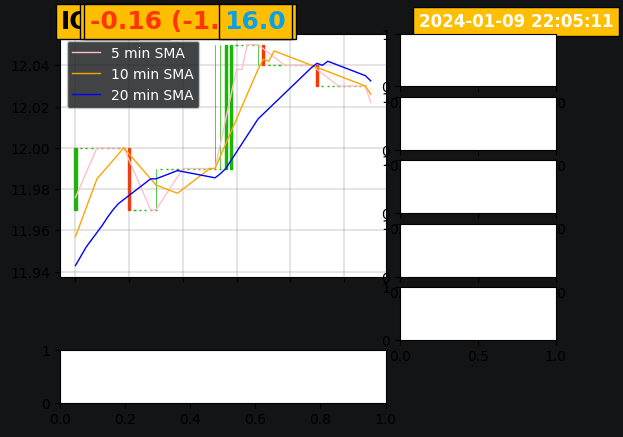

In [49]:
%matplotlib inline
# Plotting:
fig = plt.figure()
fig.patch.set_facecolor("#121416")
gs = fig.add_gridspec(6,6)
ax1 = fig.add_subplot(gs[0:4, 0:4])
ax2 = fig.add_subplot(gs[0, 4:6])
ax3 = fig.add_subplot(gs[1, 4:6])
ax4 = fig.add_subplot(gs[2, 4:6])
ax5 = fig.add_subplot(gs[3, 4:6])
ax6 = fig.add_subplot(gs[4, 4:6])
ax7 = fig.add_subplot(gs[5, 0:4])
def animate(i):

    """time_stamp = datetime.datetime.now() - datetime.timedelta(hours=1) # 1 hour faster than time in Nashville
    time_stamp = time_stamp.strftime('%Y-%m-%d')
    filename = str(time_stamp)+ ' stock_data.csv'"""

    filename = r'C:\Users\User\Desktop\QuantPack\2024-01-03 stock_data.csv'

    data, latest_price, latest_change, target, volume = read_data_ohlc(filename, Stock[0], usecols = [1,3,4,5,6])

    candle_counter = range(len(data['open'])-1)
    ohlc = []
    for candle in candle_counter:
        append_me = candle_counter[candle], data['open'][candle], data['high'][candle], data['low'][candle], data['close'][candle]
        ohlc.append(append_me)

    ax1.clear()
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup = '#18b800', colordown='#ff3503')
    ax1.plot(data['MA5'],color='pink', linestyle='-', linewidth= 1, label='5 min SMA' )
    ax1.plot(data['MA10'],color='orange', linestyle='-', linewidth= 1, label='10 min SMA' )
    ax1.plot(data['MA20'],color='blue', linestyle='-', linewidth= 1, label='20 min SMA' )

    leg = ax1.legend(loc='upper left', facecolor='#121416', fontsize=10)

    for text in leg.get_texts():
        plt.setp(text, color='w')


    ax1.text(0.005, 1.05, Stock[0], transform=ax1.transAxes, color='black',fontsize=18, fontweight='bold',
                horizontalalignment='left', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))


    ax1.text(0.2, 1.05, latest_price, transform=ax1.transAxes, color='white',fontsize=18, fontweight='bold',
                horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))


    if latest_change[0] == '+':
        colorcode = '#18b800' # for green 
    else:
        colorcode = '#ff3503' # for red

    ax1.text(0.4, 1.05, latest_change, transform=ax1.transAxes, color=colorcode,fontsize=18, fontweight='bold',
                horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))

    ax1.text(0.6, 1.05, target, transform=ax1.transAxes, color='#08a0e9',fontsize=18, fontweight='bold',
                horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))


    time_stamp = datetime.datetime.now()
    time_stamp = time_stamp.strftime('%Y-%m-%d %H:%M:%S')

    ax1.text(1.4, 1.05, time_stamp, transform=ax1.transAxes, color='white',fontsize=12, fontweight='bold',
                horizontalalignment='center', verticalalignment='center', bbox=dict(facecolor='#FFBF00'))

    ax1.grid(True, color='grey', linestyle='-', which='major',axis='both', linewidth=0.3)
    ax1.set_xticklabels([])
    
ani = animation.FuncAnimation(fig, animate, interval=1)




In [40]:
df

,name,price,change,volume,target
time,,,,,
2023-12-29 02:14:32,IONQ,12.39,-0.84 (-6.39%),7844927.0,16.0
2023-12-29 02:14:36,IONQ,12.39,-0.84 (-6.39%),7844927.0,16.0
2023-12-29 02:14:39,IONQ,12.39,-0.84 (-6.39%),7844927.0,16.0
2023-12-29 02:14:43,IONQ,12.39,-0.84 (-6.39%),7844927.0,16.0
2023-12-29 02:14:47,IONQ,12.39,-0.84 (-6.39%),7844927.0,16.0
...,...,...,...,...,...
2023-12-29 03:08:27,IONQ,12.39,-0.84 (-6.35%),8486915.0,16.0
2023-12-29 03:08:31,IONQ,12.39,-0.84 (-6.35%),8486915.0,16.0
2023-12-29 03:08:35,IONQ,12.39,-0.84 (-6.35%),8486915.0,16.0
